In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
def sigmoid(t):
    v = 1/(1+np.exp(-t))
    return v

def stable(t):
    v = 0*t
    return v

def decreasing(t):
    v = - sigmoid(10*(t-0.5))
    return v

def increasing(t):
    v = sigmoid(10*(t-0.5))
    return v

def moderate_freq(t):
    v = np.sin(6*t)
    return v

def high_freq(t):
    v = np.sin(8*t)
    return v

def low_freq(t):
    v = np.sin(4*t)
    return v

def sampling(fn, times, phases):
    x = fn(times-phases)
    return x

In [3]:
# (phenotype, y_label, c_label)
phenotypes_1 = [(stable, 1, 1), (decreasing,2, 2), (increasing, 2, 3)]
phenotypes_2 = [(moderate_freq, 1, 1), (high_freq, 2, 2), (low_freq, 2, 3)]


In [4]:
seed = 1212
rng = np.random.default_rng(seed=seed)

In [5]:
def gen_time_series(times, phases, phenotypes, rng, randomize = False):
    N, T = times.shape
    x = np.zeros((N,T,1))
    y = np.zeros((N,T))
    c = np.zeros((N,T))

    start = 0 
    subgroup_size = int(N/len(phenotypes))
    
    indicies = np.arange(0,N,dtype=int)
    if randomize:
        rng.shuffle(indicies)

    for i, (fn, y_label, c_label) in enumerate(phenotypes):
        end = min(N, start+subgroup_size)
        idx_sel = np.arange(start,end,dtype=int)
        idx = indicies[idx_sel]
        observation = sampling(fn, times[idx],phases[idx])
        x[idx,:,0] = observation
        y[idx] = y_label
        c[idx] = c_label
        start = end

    x += 0.1*rng.normal(size=(N,T,1))
    return x, y, c


In [6]:
N = 400*len(phenotypes_1)
T = 20
t_scale=2
alpha = 3*np.ones(T)
dt = rng.dirichlet(alpha,size=(N,))
times = t_scale*np.cumsum(dt, axis=1)
phases = rng.exponential(scale=0.3,size=(N,1))

mask = np.ones_like(times)

In [7]:
x1,y1,c1 = gen_time_series(times, phases, phenotypes_1, rng, randomize=True)
np.savez_compressed("data-sigmoid.npz", x = x1,t = times, y = y1, c=c1, mask=mask)

x2,y2,c2 = gen_time_series(times, phases, phenotypes_2, rng, randomize=True)
np.savez_compressed("data-periodicity.npz", x = x2,t = times, y = y2, c=c2, mask=mask)

x = np.concatenate([x1,x2],axis=-1)
np.savez_compressed("data-mixed.npz", x = x,t = times, y = y2, c=c2, mask=mask)


In [8]:
data = np.load('data-sigmoid.npz')
t,x,y,c,mask = data['t'], data['x'], data['y'], data['c'], data['mask'],

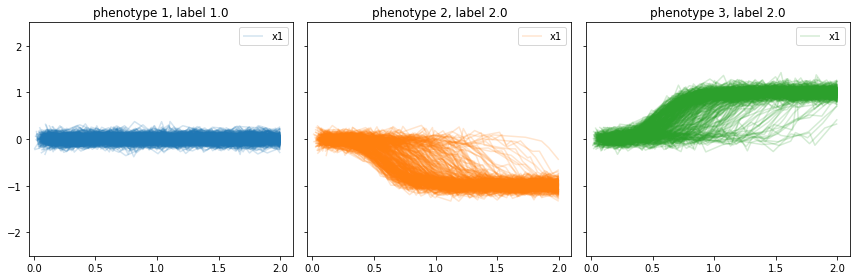

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4*3,4),sharex=True,  sharey=True)
for p in range(3):
    ax = axs[p]
    idx, = np.where((c[:,-1]==p+1))
    i = idx[:]
    line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t[i], x[i,:,0])], label='x1', color=plt.cm.tab10(p),alpha=0.2)
    ax.add_collection(line_segments)
    ax.set_title(f'phenotype {p+1}, label {y[i[0],-1]}')
    ax.legend()
    ax.set_xlim([-0.04,2.1])
    ax.set_ylim([-2.5,2.5])  
fig.tight_layout()

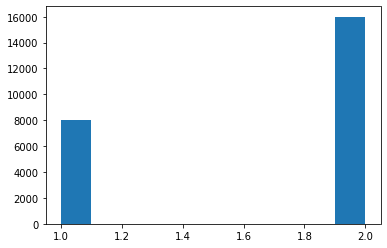

In [10]:
_ = plt.hist(y.flatten())

In [11]:
data = np.load('data-periodicity.npz')
t,x,y,c,mask = data['t'], data['x'], data['y'], data['c'], data['mask'],

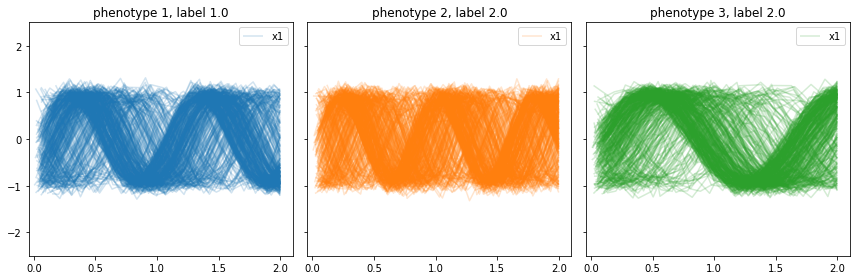

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4*3,4),sharex=True,  sharey=True)
for p in range(3):
    ax = axs[p]
    idx, = np.where((c[:,-1]==p+1))
    i = idx[:]
    line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t[i], x[i,:,0])], label='x1', color=plt.cm.tab10(p),alpha=0.2)
    ax.add_collection(line_segments)
    ax.set_title(f'phenotype {p+1}, label {y[i[0],-1]}')
    ax.legend()
    ax.set_xlim([-0.04,2.1])
    ax.set_ylim([-2.5,2.5])  
fig.tight_layout()

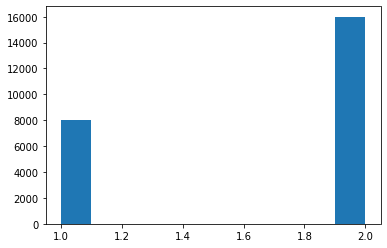

In [13]:
_ = plt.hist(y.flatten())

In [14]:
data = np.load('data-mixed.npz')
t,x,y,c,mask = data['t'], data['x'], data['y'], data['c'], data['mask'],

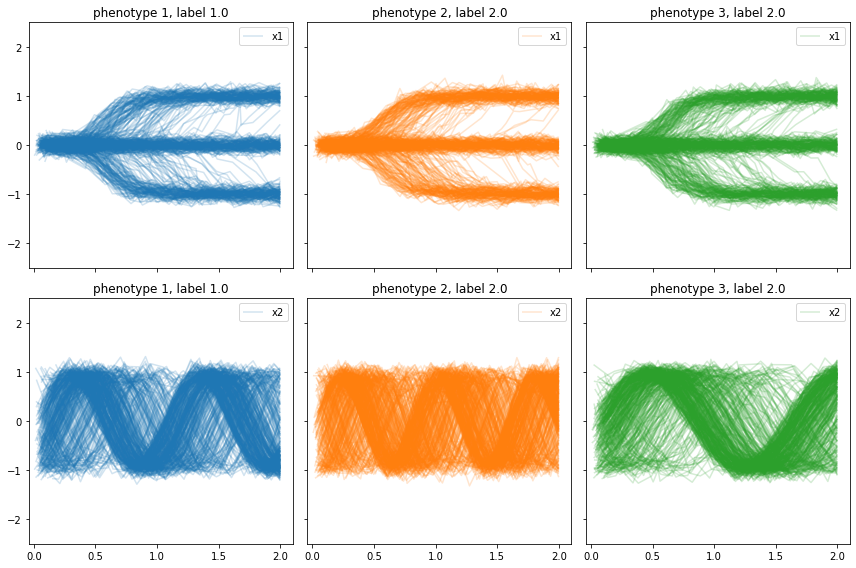

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(4*3,4*2),sharex=True,  sharey=True)
for x_dim in range(2):
    for p in range(3):
        ax = axs[x_dim, p]
        idx, = np.where(c[:,-1]==p+1)
        line_segments = LineCollection([np.column_stack([ti, xi]) for ti,xi in zip(t[idx], x[idx,:,x_dim])], label=f'x{x_dim+1}', color=plt.cm.tab10(p),alpha=0.2)
        ax.add_collection(line_segments)
        ax.set_title(f'phenotype {p+1}, label {y[idx[0],-1]}')
        ax.legend()
        ax.set_xlim([-0.04,2.1])
        ax.set_ylim([-2.5,2.5])  
fig.tight_layout()

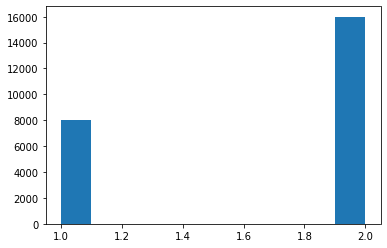

In [16]:
_ = plt.hist(y.flatten())